In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv("/home/hemanth/Downloads/MARUTI.csv")

In [3]:
data.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2003-07-09,MARUTI,EQ,125.00,164.90,170.40,155.00,164.0,164.30,165.95,35164283,5.835528e+14,NaN,8537695.0,0.2428
1,2003-07-10,MARUTI,EQ,164.30,167.00,168.70,164.50,167.0,167.00,166.74,10464179,1.744820e+14,NaN,4363947.0,0.4170
2,2003-07-11,MARUTI,EQ,167.00,167.75,174.85,166.25,173.6,173.35,172.45,11740117,2.024622e+14,NaN,3014852.0,0.2568
3,2003-07-14,MARUTI,EQ,173.35,174.25,179.25,174.25,178.6,177.95,177.91,5982324,1.064313e+14,NaN,1949217.0,0.3258
4,2003-07-15,MARUTI,EQ,177.95,200.00,200.00,173.00,176.3,176.20,176.88,6173689,1.092001e+14,NaN,1307694.0,0.2118


In [4]:
data.tail()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
4300,2020-10-26,MARUTI,EQ,7103.25,7100.00,7161.30,6935.05,7056.5,7054.80,7056.34,1559361,1.100339e+15,133834.0,367279.0,0.2355
4301,2020-10-27,MARUTI,EQ,7054.80,7067.00,7209.75,7053.00,7148.0,7158.40,7139.86,1461819,1.043718e+15,167498.0,541628.0,0.3705
4302,2020-10-28,MARUTI,EQ,7158.40,7194.95,7332.00,7110.00,7173.0,7186.05,7240.73,1645177,1.191228e+15,179960.0,492932.0,0.2996
4303,2020-10-29,MARUTI,EQ,7186.05,7114.00,7199.00,6986.70,7084.0,7117.70,7092.42,1434853,1.017658e+15,135003.0,271487.0,0.1892
4304,2020-10-30,MARUTI,EQ,7117.70,7079.05,7110.00,6881.00,6938.0,6965.15,6979.63,1360249,9.494032e+14,104074.0,270369.0,0.1988


In [5]:
# For the sake of this notebook, I shall limit the number of columns to keep things simple. 

data1 = data[['Date','Open','High','Low','Close','Volume','VWAP']]

In [6]:
data1.head()

,Date,Open,High,Low,Close,Volume,VWAP
0,2003-07-09,164.90,170.40,155.00,164.30,35164283,165.95
1,2003-07-10,167.00,168.70,164.50,167.00,10464179,166.74
2,2003-07-11,167.75,174.85,166.25,173.35,11740117,172.45
3,2003-07-14,174.25,179.25,174.25,177.95,5982324,177.91
4,2003-07-15,200.00,200.00,173.00,176.20,6173689,176.88


In [7]:
data1.describe()

,Open,High,Low,Close,Volume,VWAP
count,4305.000000,4305.000000,4305.000000,4305.000000,4.305000e+03,4305.00000
mean,2803.934472,2837.747433,2767.077549,2801.740918,1.197402e+06,2802.90236
std,2681.161552,2704.761111,2652.623803,2677.195355,1.658447e+06,2678.71221
min,164.000000,168.700000,155.000000,164.300000,2.279600e+04,165.06000
25%,815.000000,829.950000,796.250000,812.450000,4.216340e+05,813.51000
50%,1391.550000,1412.000000,1370.250000,1390.800000,6.831620e+05,1391.64000
75%,4600.000000,4645.950000,4557.250000,4606.900000,1.204104e+06,4602.97000
max,9966.000000,9996.400000,9725.000000,9832.450000,3.516428e+07,9850.96000


In [8]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4305 entries, 0 to 4304
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    4305 non-null   object 
 1   Open    4305 non-null   float64
 2   High    4305 non-null   float64
 3   Low     4305 non-null   float64
 4   Close   4305 non-null   float64
 5   Volume  4305 non-null   int64  
 6   VWAP    4305 non-null   float64
dtypes: float64(5), int64(1), object(1)
memory usage: 235.6+ KB


In [9]:
data1.isna().sum()

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
VWAP      0
dtype: int64

### It appears that the Date column is being treated as a string rather than as dates. To fix this, we’ll use the pandas to_datetime() feature which converts the arguments to dates.

In [10]:
# Convert string to datetime64
data1['Date'] = data1['Date'].apply(pd.to_datetime)
data1.set_index('Date',inplace=True)
data1.head()

<ipython-input-10-9b141c814383>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['Date'] = data1['Date'].apply(pd.to_datetime)


,Open,High,Low,Close,Volume,VWAP
Date,,,,,,
2003-07-09,164.90,170.40,155.00,164.30,35164283,165.95
2003-07-10,167.00,168.70,164.50,167.00,10464179,166.74
2003-07-11,167.75,174.85,166.25,173.35,11740117,172.45
2003-07-14,174.25,179.25,174.25,177.95,5982324,177.91
2003-07-15,200.00,200.00,173.00,176.20,6173689,176.88


# About the Stock Data

### Visualising the Time Series data

Text(0, 0.5, 'VWAP')

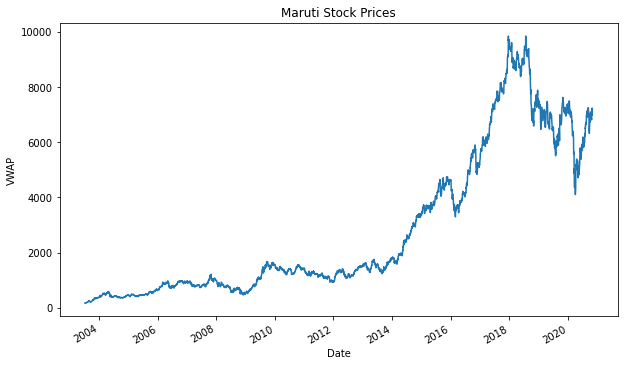

In [11]:
data1['VWAP'].plot(figsize=(10,6),title='Maruti Stock Prices')
plt.ylabel('VWAP')


### Manipulating TimeSeries dataset

In [12]:
from datetime import datetime
my_year = 2019
my_month = 4
my_day = 21
my_hour = 10
my_minute = 5
my_second = 30

In [13]:
test_date = datetime(my_year, my_month, my_day)
test_date


datetime.datetime(2019, 4, 21, 0, 0)

In [14]:
test_date = datetime(my_year, my_month, my_day, my_hour, my_minute, my_second)
print('The day is : ', test_date.day)
print('The hour is : ', test_date.hour)
print('The month is : ', test_date.month)

The day is :  21
The hour is :  10
The month is :  4


In [15]:
print(data.index.max())
print(data.index.min())


4304
0


In [16]:
# Earliest date index location
print('Earliest date index location is: ',data.index.argmin())

# Latest date location
print('Latest date location: ',data.index.argmax())

Earliest date index location is:  0
Latest date location:  4304


### Subsetting Data Using Pandas Dataframes

In [17]:
df_vwap = data[['Date','VWAP']]
df_vwap['Date'] = df_vwap['Date'].apply(pd.to_datetime)
df_vwap.set_index("Date", inplace = True)
df_vwap.head()


<ipython-input-17-83a772649b70>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_vwap['Date'] = df_vwap['Date'].apply(pd.to_datetime)


,VWAP
Date,
2003-07-09,165.95
2003-07-10,166.74
2003-07-11,172.45
2003-07-14,177.91
2003-07-15,176.88


In [18]:
# Slicing on year
vwap_subset = df_vwap['2017':'2020']

# Slicing on month
vwap_subset = df_vwap['2017-01':'2020-12']

#Slicing on day
vwap_subset = df_vwap['2017-01-01':'2020-12-15']


# Visualizing the volume weighted average price (VWAP)

### Visualizing using markers

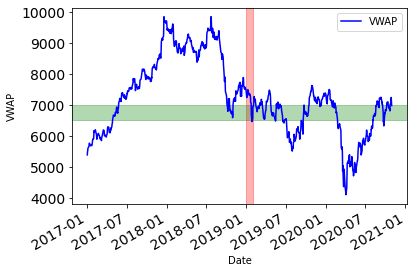

In [19]:
ax = vwap_subset.plot(color='blue',fontsize=14)
ax.set_xlabel('Date')
ax.set_ylabel('VWAP')

ax.axvspan('2019-01-01','2019-01-31', color='red', alpha=0.3)
ax.axhspan(6500,7000, color='green',alpha=0.3)

plt.show()


### Visualising using KDEs

<AxesSubplot:xlabel='VWAP', ylabel='Density'>

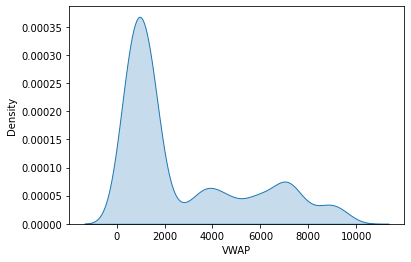

In [20]:
sns.kdeplot(df_vwap['VWAP'],shade=True)

### Visualising using Lineplots

<AxesSubplot:title={'center':' volume weighted average price'}, xlabel='Date'>

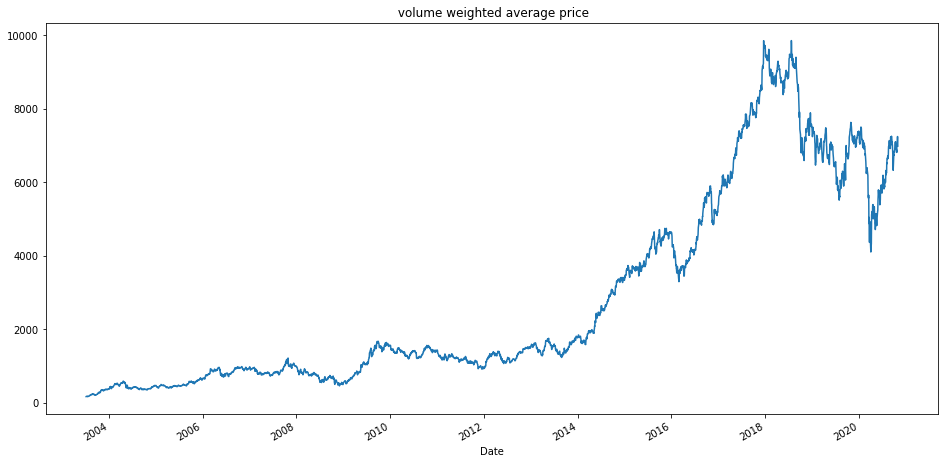

In [21]:
# Visualising the VWAP 
df_vwap['VWAP'].plot(figsize=(16,8),title=' volume weighted average price')

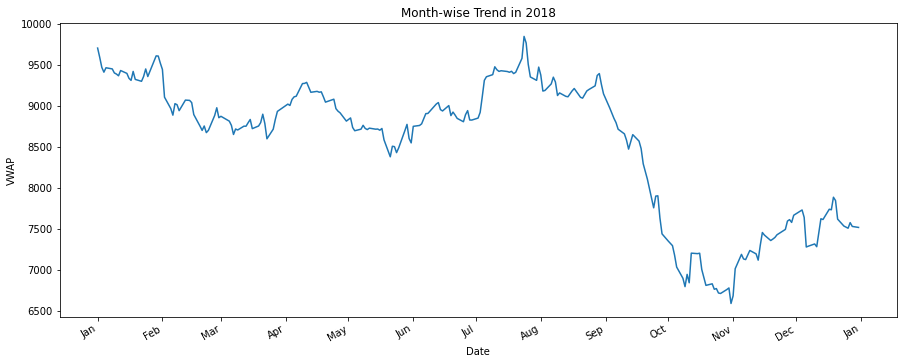

In [25]:
import matplotlib.dates as mdates

ax = df_vwap.loc['2018', 'VWAP'].plot(figsize=(15,6))
ax.set_title('Month-wise Trend in 2018'); 
ax.set_ylabel('VWAP');
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'));

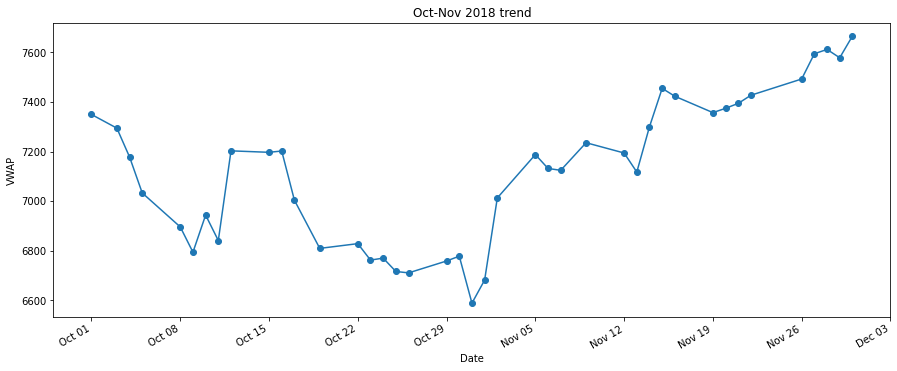

In [26]:
ax = df_vwap.loc['2018-10':'2018-11','VWAP'].plot(marker='o', linestyle='-',figsize=(15,6))
ax.set_title('Oct-Nov 2018 trend'); 
ax.set_ylabel('VWAP');
ax.xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=mdates.MONDAY))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'));

### Time-series seasonal decomposition

<ipython-input-27-55f1aa2a62cc>:9: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  result_mul = seasonal_decompose(y, model='multiplicative',freq = 52)
<ipython-input-27-55f1aa2a62cc>:12: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  result_add = seasonal_decompose(y, model='additive',freq = 52)


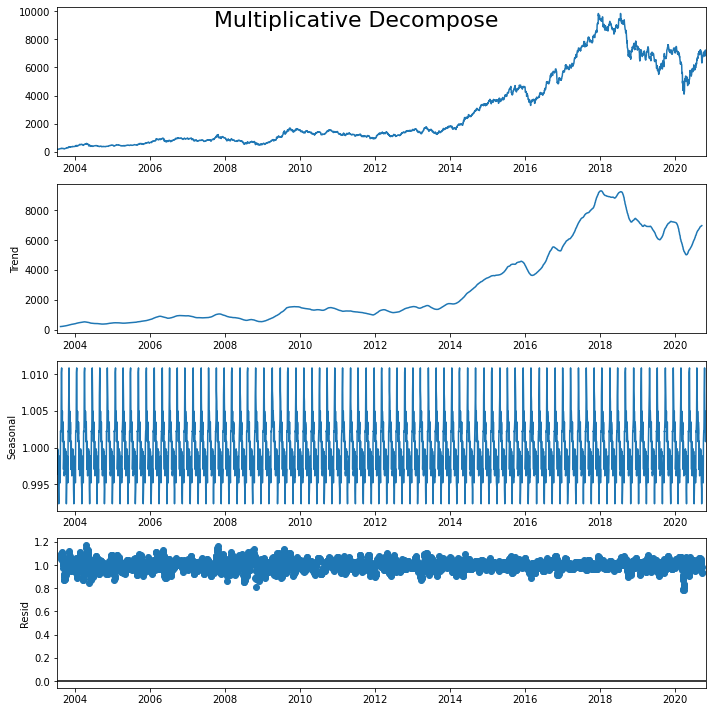

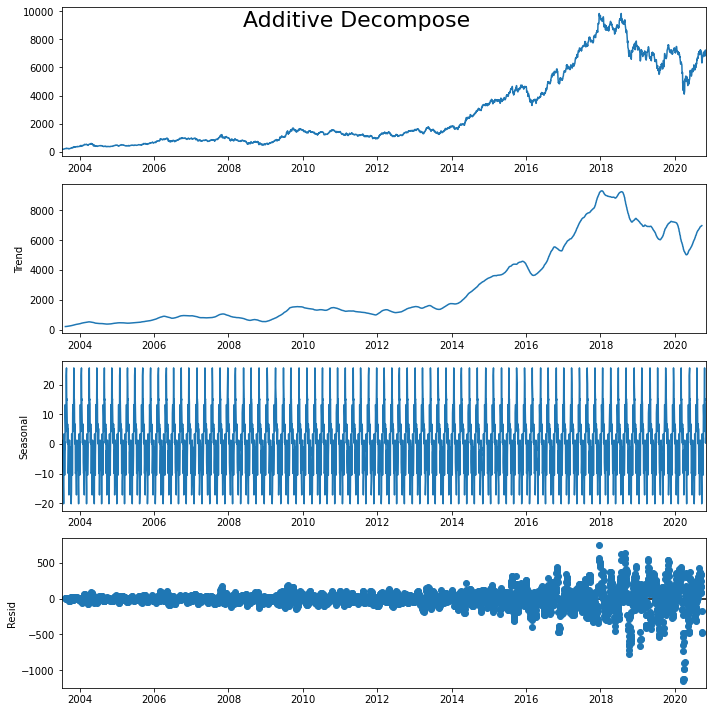

In [27]:
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse

plt.rcParams.update({'figure.figsize': (10,10)})
y = df_vwap['VWAP'].to_frame()


# Multiplicative Decomposition 
result_mul = seasonal_decompose(y, model='multiplicative',freq = 52)

# Additive Decomposition
result_add = seasonal_decompose(y, model='additive',freq = 52)

# Plot
plt.rcParams.update({'figure.figsize': (10,10)})
result_mul.plot().suptitle('Multiplicative Decompose', fontsize=22)
result_add.plot().suptitle('Additive Decompose', fontsize=22)
plt.show()


In [28]:
## Extract the Components
# Actual Values = Product of (Seasonal * Trend * Resid)
df_reconstructed = pd.concat([result_add.seasonal, result_add.trend, result_add.resid, result_add.observed], axis=1)
df_reconstructed.columns = ['seas', 'trend', 'resid', 'actual_values']
df_reconstructed.tail()

,seas,trend,resid,actual_values
Date,,,,
2020-10-26,13.391835,NaN,NaN,7056.34
2020-10-27,7.351502,NaN,NaN,7139.86
2020-10-28,4.165980,NaN,NaN,7240.73
2020-10-29,0.249585,NaN,NaN,7092.42
2020-10-30,1.861383,NaN,NaN,6979.63


# Feature Extraction

In [30]:
df_vwap.reset_index(inplace=True)
df_vwap['year'] = df_vwap.Date.dt.year
df_vwap['month'] = df_vwap.Date.dt.month
df_vwap['day'] = df_vwap.Date.dt.day
df_vwap['day of week'] = df_vwap.Date.dt.dayofweek


df_vwap['Weekday'] = df_vwap['Date'].dt.day_name()

#df_vwap['Weekday Name'] = df_vwap.Date.dt.weekday_name


#Set Date column as the index column.
df_vwap.set_index('Date', inplace=True)
df_vwap.head()

<ipython-input-30-d6f964317d4f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_vwap['year'] = df_vwap.Date.dt.year
<ipython-input-30-d6f964317d4f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_vwap['month'] = df_vwap.Date.dt.month
<ipython-input-30-d6f964317d4f>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/use

,index,VWAP,year,month,day,day of week,Weekday
Date,,,,,,,
2003-07-09,0,165.95,2003,7,9,2,Wednesday
2003-07-10,1,166.74,2003,7,10,3,Thursday
2003-07-11,2,172.45,2003,7,11,4,Friday
2003-07-14,3,177.91,2003,7,14,0,Monday
2003-07-15,4,176.88,2003,7,15,1,Tuesday


## Time resampling

In [31]:
df_vwap.resample(rule = 'A').mean()[:5]

,index,VWAP,year,month,day,day of week
Date,,,,,,
2003-12-31,61.5,266.608468,2003.0,9.604839,16.298387,2.016129
2004-12-31,250.5,430.522835,2004.0,6.559055,15.708661,2.047244
2005-12-31,503.0,494.328566,2005.0,6.541833,15.733068,2.000000
2006-12-31,753.5,845.582160,2006.0,6.552000,15.976000,2.056000
2007-12-31,1003.0,887.107871,2007.0,6.554217,15.843373,1.987952


Text(0.5, 1.0, 'Yearly Mean VWAP for Maruti')

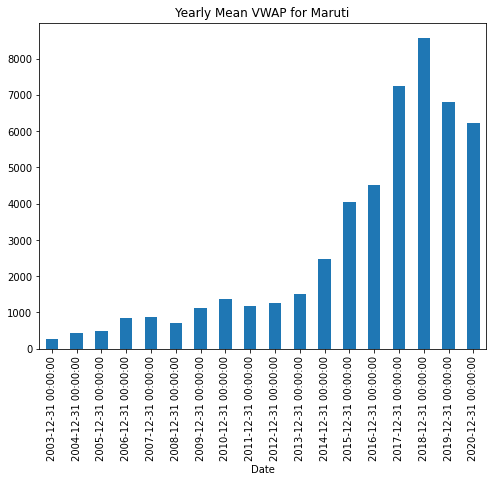

In [32]:
plt.rcParams['figure.figsize'] = (8, 6)
df_vwap['VWAP'].resample('A').mean().plot(kind='bar')
plt.title('Yearly Mean VWAP for Maruti')

Text(0.5, 1.0, 'Yearly start Mean VWAP for Maruti')

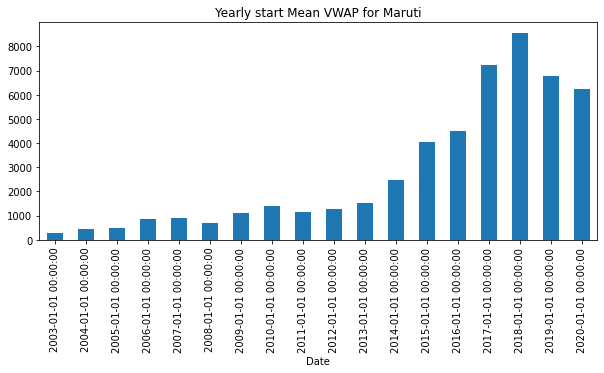

In [33]:
df_vwap['VWAP'].resample('AS').mean().plot(kind='bar',figsize = (10,4))
plt.title('Yearly start Mean VWAP for Maruti')

### Time Shifting

In [34]:
df_vwap.head()

,index,VWAP,year,month,day,day of week,Weekday
Date,,,,,,,
2003-07-09,0,165.95,2003,7,9,2,Wednesday
2003-07-10,1,166.74,2003,7,10,3,Thursday
2003-07-11,2,172.45,2003,7,11,4,Friday
2003-07-14,3,177.91,2003,7,14,0,Monday
2003-07-15,4,176.88,2003,7,15,1,Tuesday


### Forward Shifting

In [35]:
df_vwap.shift(1).head()



,index,VWAP,year,month,day,day of week,Weekday
Date,,,,,,,
2003-07-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2003-07-10,0.0,165.95,2003.0,7.0,9.0,2.0,Wednesday
2003-07-11,1.0,166.74,2003.0,7.0,10.0,3.0,Thursday
2003-07-14,2.0,172.45,2003.0,7.0,11.0,4.0,Friday
2003-07-15,3.0,177.91,2003.0,7.0,14.0,0.0,Monday


### Backwards Shifting

In [36]:
df_vwap.shift(-1).head()

,index,VWAP,year,month,day,day of week,Weekday
Date,,,,,,,
2003-07-09,1.0,166.74,2003.0,7.0,10.0,3.0,Thursday
2003-07-10,2.0,172.45,2003.0,7.0,11.0,4.0,Friday
2003-07-11,3.0,177.91,2003.0,7.0,14.0,0.0,Monday
2003-07-14,4.0,176.88,2003.0,7.0,15.0,1.0,Tuesday
2003-07-15,5.0,177.59,2003.0,7.0,16.0,2.0,Wednesday


### Shifting based off time string code

In [37]:
df_vwap.tshift(periods=3, freq = 'M').head()

<ipython-input-37-f1f014cfbdff>:1: FutureWarning: tshift is deprecated and will be removed in a future version. Please use shift instead.
  df_vwap.tshift(periods=3, freq = 'M').head()


,index,VWAP,year,month,day,day of week,Weekday
Date,,,,,,,
2003-09-30,0,165.95,2003,7,9,2,Wednesday
2003-09-30,1,166.74,2003,7,10,3,Thursday
2003-09-30,2,172.45,2003,7,11,4,Friday
2003-09-30,3,177.91,2003,7,14,0,Monday
2003-09-30,4,176.88,2003,7,15,1,Tuesday


### Rolling windows

<AxesSubplot:xlabel='Date'>

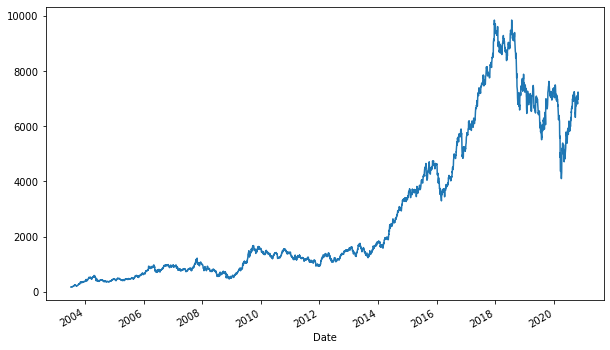

In [38]:
df_vwap['VWAP'].plot(figsize = (10,6))

In [39]:
df_vwap.rolling(7).mean().head(10)


,index,VWAP,year,month,day,day of week
Date,,,,,,
2003-07-09,NaN,NaN,NaN,NaN,NaN,NaN
2003-07-10,NaN,NaN,NaN,NaN,NaN,NaN
2003-07-11,NaN,NaN,NaN,NaN,NaN,NaN
2003-07-14,NaN,NaN,NaN,NaN,NaN,NaN
2003-07-15,NaN,NaN,NaN,NaN,NaN,NaN
2003-07-16,NaN,NaN,NaN,NaN,NaN,NaN
2003-07-17,3.0,173.285714,2003.0,7.0,13.142857,2.142857
2003-07-18,4.0,173.530000,2003.0,7.0,14.428571,2.428571
2003-07-21,5.0,173.520000,2003.0,7.0,16.000000,2.000000


<AxesSubplot:xlabel='Date'>

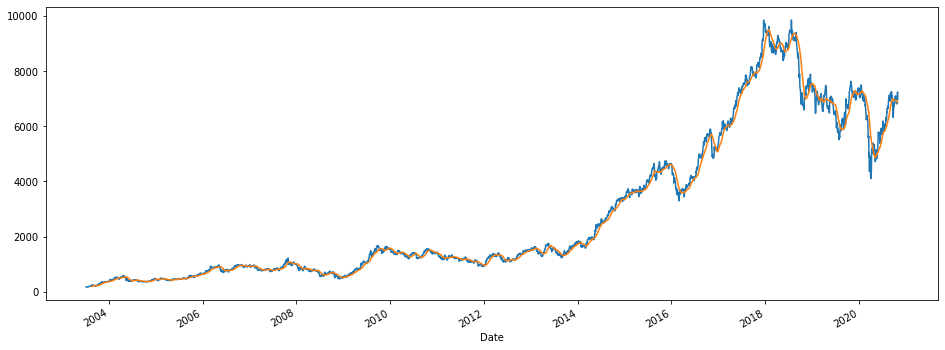

In [40]:
df_vwap['VWAP'].plot()
df_vwap.rolling(window=30).mean()['VWAP'].plot(figsize=(16, 6))


### Handling Missing Values in Time-series Data

In [41]:
#Checking for missing values
df_vwap.isnull().sum()


index          0
VWAP           0
year           0
month          0
day            0
day of week    0
Weekday        0
dtype: int64